In [1]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Note: Data was originally ingested into MySQL via a custom ingestion pipeline.
# For the purpose of this EDA, we load directly from the original CSV files.
df1 = pd.read_csv('/content/transaction.csv')
df2 = pd.read_csv('/content/customer.csv')

In [3]:
df1.head()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10108 entries, 0 to 10107
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Client_Num             10108 non-null  int64  
 1   Card_Category          10108 non-null  object 
 2   Annual_Fees            10108 non-null  int64  
 3   Activation_30_Days     10108 non-null  int64  
 4   Customer_Acq_Cost      10108 non-null  int64  
 5   Week_Start_Date        10108 non-null  object 
 6   Week_Num               10108 non-null  object 
 7   Qtr                    10108 non-null  object 
 8   current_year           10108 non-null  int64  
 9   Credit_Limit           10108 non-null  float64
 10  Total_Revolving_Bal    10108 non-null  int64  
 11  Total_Trans_Amt        10108 non-null  int64  
 12  Total_Trans_Vol        10108 non-null  int64  
 13  Avg_Utilization_Ratio  10108 non-null  float64
 14  Use Chip               10108 non-null  object 
 15  Ex

In [4]:
df2.head()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10108 entries, 0 to 10107
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Client_Num               10108 non-null  int64 
 1   Customer_Age             10108 non-null  int64 
 2   Gender                   10108 non-null  object
 3   Dependent_Count          10108 non-null  int64 
 4   Education_Level          10108 non-null  object
 5   Marital_Status           10108 non-null  object
 6   state_cd                 10108 non-null  object
 7   Zipcode                  10108 non-null  int64 
 8   Car_Owner                10108 non-null  object
 9   House_Owner              10108 non-null  object
 10  Personal_loan            10108 non-null  object
 11  contact                  10108 non-null  object
 12  Customer_Job             10108 non-null  object
 13  Income                   10108 non-null  int64 
 14  Cust_Satisfaction_Score  10108 non-nul

In [5]:
df_trans = df1.copy()
df_cust = df2.copy()

In [6]:
df = pd.merge(df_trans, df_cust, on = 'Client_Num', how = 'inner')
df.shape
df.head()

,Client_Num,Card_Category,Annual_Fees,Activation_30_Days,Customer_Acq_Cost,Week_Start_Date,Week_Num,Qtr,current_year,Credit_Limit,...,Marital_Status,state_cd,Zipcode,Car_Owner,House_Owner,Personal_loan,contact,Customer_Job,Income,Cust_Satisfaction_Score
0,708082083,Blue,200,0,87,01-01-2023,Week-1,Q1,2023,3544.0,...,Single,FL,91750,no,yes,no,unknown,Businessman,202326,3
1,708083283,Blue,445,1,108,01-01-2023,Week-1,Q1,2023,3421.0,...,Married,NJ,91750,no,no,no,cellular,Selfemployeed,5225,2
2,708084558,Blue,140,0,106,01-01-2023,Week-1,Q1,2023,8258.0,...,Married,NJ,91750,yes,no,no,unknown,Selfemployeed,14235,2
3,708085458,Blue,250,1,150,01-01-2023,Week-1,Q1,2023,1438.3,...,Single,NY,91750,no,no,no,cellular,Blue-collar,45683,1
4,708086958,Blue,320,1,106,01-01-2023,Week-1,Q1,2023,3128.0,...,Single,TX,91750,yes,yes,no,cellular,Businessman,59279,1


In [7]:
df.isnull().sum()

,0
Client_Num,0
Card_Category,0
Annual_Fees,0
Activation_30_Days,0
Customer_Acq_Cost,0
Week_Start_Date,0
Week_Num,0
Qtr,0
current_year,0
Credit_Limit,0


In [8]:
df.describe()

,Client_Num,Annual_Fees,Activation_30_Days,Customer_Acq_Cost,current_year,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Vol,Avg_Utilization_Ratio,Interest_Earned,Delinquent_Acc,Customer_Age,Dependent_Count,Zipcode,Income,Cust_Satisfaction_Score
count,1.010800e+04,10108.000000,10108.000000,10108.000000,10108.0,10108.000000,10108.000000,10108.000000,10108.000000,10108.000000,10108.000000,10108.000000,10108.000000,10108.000000,10108.000000,10108.000000,10108.000000
mean,7.390104e+08,291.849525,0.574693,96.254056,2023.0,8635.642808,1162.792145,4404.631282,64.864563,0.274851,775.957878,0.060744,46.274436,2.345370,91663.071824,56976.101998,3.189256
std,3.673623e+07,118.339384,0.494414,25.768677,0.0,9093.136113,815.160709,3397.910673,23.475110,0.275720,723.952320,0.238872,8.087876,1.299486,1693.093868,46183.718233,1.263101
min,7.080821e+08,95.000000,0.000000,40.000000,2023.0,1438.300000,0.000000,510.000000,10.000000,0.000000,42.140000,0.000000,21.000000,0.000000,53010.000000,1250.000000,1.000000
25%,7.130267e+08,195.000000,0.000000,79.000000,2023.0,2552.750000,355.500000,2155.750000,45.000000,0.022000,326.150000,0.000000,41.000000,1.000000,91750.000000,22635.750000,2.000000
50%,7.179037e+08,295.000000,1.000000,95.000000,2023.0,4549.000000,1276.500000,3899.500000,67.000000,0.175000,559.985000,0.000000,46.000000,2.000000,91750.000000,44768.500000,3.000000
75%,7.727989e+08,395.000000,1.000000,112.000000,2023.0,11070.250000,1784.000000,4741.000000,81.000000,0.503000,962.685000,0.000000,52.000000,3.000000,91750.000000,76392.750000,4.000000
max,8.278908e+08,500.000000,1.000000,172.000000,2023.0,34516.000000,2517.000000,18484.000000,139.000000,0.999000,4785.000000,1.000000,73.000000,5.000000,99504.000000,239791.000000,5.000000


##Insight:
The dataset contains 10,108 records with no missing values. Some columns such as Income (used to define customer profile types), Interest_Earned (reflecting revenue for the bank), and Total_Trans_Amt (indicating high-spending customers) show unusually large values for a few records. The average customer is approximately 46 years old and has around 2 dependents.

In [9]:
df['Revenue'] = df['Annual_Fees'] + df['Interest_Earned']

In [10]:
df['AgeGroup'] = pd.cut(
    df['Customer_Age'],
    bins = [0,30,40,50,60, float('inf')],
    labels = ['20-30', '30-40', '40-50', '50-60', '60+']
)

In [11]:
df['Income_Group'] = pd.cut(
    df['Income'],
    bins = [0,35000,70000,float('inf')],
    labels = ['Low', 'Medium', 'High']
)

In [12]:
top_spenders = df.groupby('Client_Num')['Total_Trans_Amt'].sum().reset_index()
top_spenders = top_spenders.sort_values(by='Total_Trans_Amt', ascending=False).head(10)

top_spenders = top_spenders.merge(df[['Client_Num', 'Gender', 'Customer_Age', 'Income']].drop_duplicates(), on='Client_Num')

top_spenders

,Client_Num,Total_Trans_Amt,Gender,Customer_Age,Income
0,718140783,18484,F,44,239791
1,717642633,17995,M,54,239676
2,801036033,17744,F,59,239639
3,716004258,17634,M,46,239346
4,713758758,17628,M,21,238949
5,712503408,17498,F,36,238789
6,778428108,17437,F,52,238388
7,721220583,17390,F,46,238349
8,756658083,17350,M,43,238224
9,713965683,17258,M,50,237836


##Insight:
The top 10 spenders are high-income customers, each with an income above ₹2.35 Lakhs. Their ages range from 21 to 59, indicating that both younger and middle-aged customers can be heavy credit card users. Gender distribution among top spenders is balanced, showing no clear gender bias in high spending behavior.

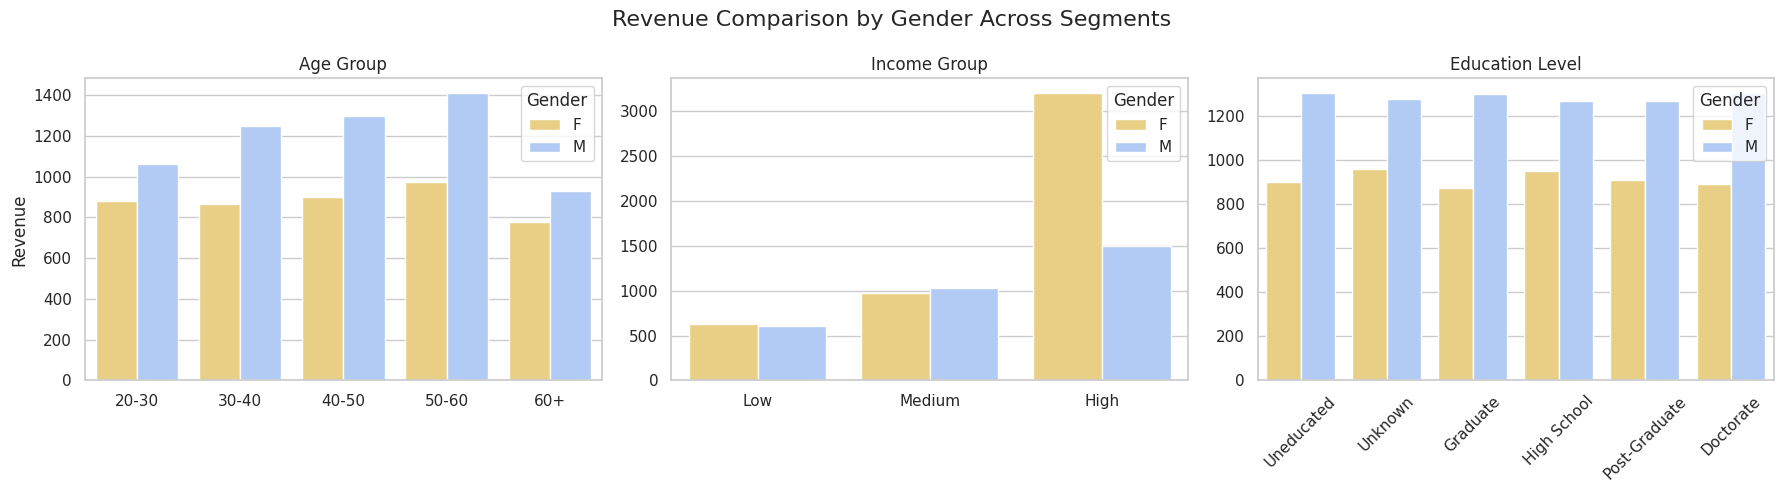

In [13]:
#style
sns.set(style="whitegrid")

gender_palette = {'M': '#a6c8ff', 'F': '#f9d776'}

#subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

#1.Age Group vs Revenue by Gender
sns.barplot(data=df, x='AgeGroup', y='Revenue', hue='Gender', ax=axes[0], palette=gender_palette, errorbar=None)
axes[0].set_title('Age Group')
axes[0].set_xlabel('')
axes[0].set_ylabel('Revenue')

#2.Income Group vs Revenue by Gender
sns.barplot(data=df, x='Income_Group', y='Revenue', hue='Gender', ax=axes[1], palette=gender_palette, errorbar=None, order=['Low', 'Medium', 'High'])
axes[1].set_title('Income Group')
axes[1].set_xlabel('')
axes[1].set_ylabel('')

#3.Education Level vs Revenue by Gender
sns.barplot(data=df, x='Education_Level', y='Revenue', hue='Gender', ax=axes[2], palette=gender_palette, errorbar=None)
axes[2].set_title('Education Level')
axes[2].set_xlabel('')
axes[2].set_ylabel('')
axes[2].tick_params(axis='x', rotation=45)

#layout
fig.suptitle('Revenue Comparison by Gender Across Segments', fontsize=16)
plt.tight_layout()
plt.show()


##Insights:
1- **Age Group vs Revenue by Gender** -

i.Both males and females contribute most revenue in the 50–60 age group.

ii.Across all age groups, males generate higher revenue for bank than females.

Middle-aged customers (40–60), especially males, are the most profitable age group. Targeted promotions or loyalty programs for this segment can drive further growth.

2- **Income Group vs Revenue by Gender**-

i.High Income, High Revenue: Unsurprisingly, high-income customers contribute the most revenue.

ii.Female High Earners: Among high-income customers, females generate significantly more revenue than males.

iii.Low Income Segment: Revenue is nearly equal and quite low for both genders

High-income females are the most profitable group in this segment. Gender-specific premium card offers or curated experiences could increase retention and satisfaction here.

3- **Education Level vs Revenue by Gender**-

i.Across all education levels, males contribute more revenue than females.

ii.Revenue from females is fairly stable, regardless of education level.

While male revenue varies with education level, female revenue remains consistent. This suggests female customer engagement may be less influenced by education, opening up a broad range of engagement opportunities.

In [14]:
sns.set(style="whitegrid")

#1. Average Income, Age, Satisfaction Score by Card Category
profile_avg = df.groupby('Card_Category')[['Income', 'Customer_Age', 'Cust_Satisfaction_Score']].mean().round(0)
print("Average Profile by Card Category:")
display(profile_avg)

#2. Gender Distribution
gender_dist = df.groupby(['Card_Category', 'Gender']).size().unstack(fill_value=0)
gender_dist_percent = (gender_dist.T / gender_dist.sum(axis=1)).T.round(2)
print("\nGender Distribution:")
display(gender_dist_percent)

#3. Education Level Distribution
edu_dist = df.groupby(['Card_Category', 'Education_Level']).size().unstack(fill_value=0)
edu_dist_percent = (edu_dist.T / edu_dist.sum(axis=1)).T.round(2)
print("\nEducation Level Distribution:")
display(edu_dist_percent)

#4. Marital Status Distribution
marital_dist = df.groupby(['Card_Category', 'Marital_Status']).size().unstack(fill_value=0)
marital_dist_percent = (marital_dist.T / marital_dist.sum(axis=1)).T.round(2)
print("\nMarital Status Distribution:")
display(marital_dist_percent)

#5.Revenue by Card Category and Gender
revenue_card_gender = df.groupby(['Card_Category', 'Gender'])['Revenue'].sum().unstack().round(0)
print("Revenue by Card Category and Gender:")
display(revenue_card_gender)

Average Profile by Card Category:


,Income,Customer_Age,Cust_Satisfaction_Score
Card_Category,,,
Blue,51966.0,46.0,3.0
Gold,140730.0,48.0,3.0
Platinum,189099.0,47.0,3.0
Silver,90720.0,47.0,3.0



Gender Distribution:


Gender,F,M
Card_Category,,
Blue,0.58,0.42
Gold,0.51,0.49
Platinum,0.51,0.49
Silver,0.57,0.43



Education Level Distribution:


Education_Level,Doctorate,Graduate,High School,Post-Graduate,Uneducated,Unknown
Card_Category,,,,,,
Blue,0.04,0.41,0.20,0.05,0.15,0.15
Gold,0.06,0.35,0.18,0.05,0.20,0.17
Platinum,0.01,0.34,0.28,0.04,0.18,0.13
Silver,0.05,0.42,0.18,0.06,0.14,0.14



Marital Status Distribution:


Marital_Status,Married,Single,Unknown
Card_Category,,,
Blue,0.51,0.42,0.07
Gold,0.44,0.51,0.05
Platinum,0.49,0.46,0.04
Silver,0.50,0.43,0.07


Revenue by Card Category and Gender:


Gender,F,M
Card_Category,,
Blue,4474991.0,4706532.0
Gold,253600.0,176394.0
Platinum,93479.0,88816.0
Silver,514993.0,484593.0


##Insights:

1- **Customer Profile by Card Category** -

i. Higher-tier cards (Platinum & Gold) are preferred by older, wealthier customers, while Blue is chosen by younger, lower-income users.

ii.Customer satisfaction is consistent (3.0) across all card types, suggesting room for differentiated experience.

2.**Gender Distribution** -

i. Blue and Silver cards are slightly more popular among females.

ii.Gold and Platinum show balanced gender appeal, indicating they are equally attractive across demographics.

3.**Education Level Distribution** -

i.Graduates dominate across all card types (~34–42%).

ii.Doctorate and Post-Graduate customers are a small segment, indicating most users are mid-level educated.

iii.Uneducated users still hold significant % (~14–20%) — especially in Gold and Platinum, suggesting income does not always correlate with education.

**NOTE** :- Banks could target Graduate segments with tailored offers

4.**Marital Status Distribution** -

i.Gold card users are mostly single, while Blue, Silver, and Platinum are slightly skewed toward married users.

**NOTE** :- Relationship status can be used to tailor offers (e.g., travel perks for singles, family benefits for married).

5- **Revenue by Card Category and Gender** -

i. Blue cardholders contribute the most revenue across all categories.

ii. Among Blue cardholders, males contribute slightly more than females.

iii. For both Gold and Platinum cards, females contribute more revenue than males.This suggests that female customers in premium segments are more active or profitable.

**NOTE** :- Males drive more revenue in mass-market (Blue, Silver).This can inform gender-targeted marketing strategies for each card tier.

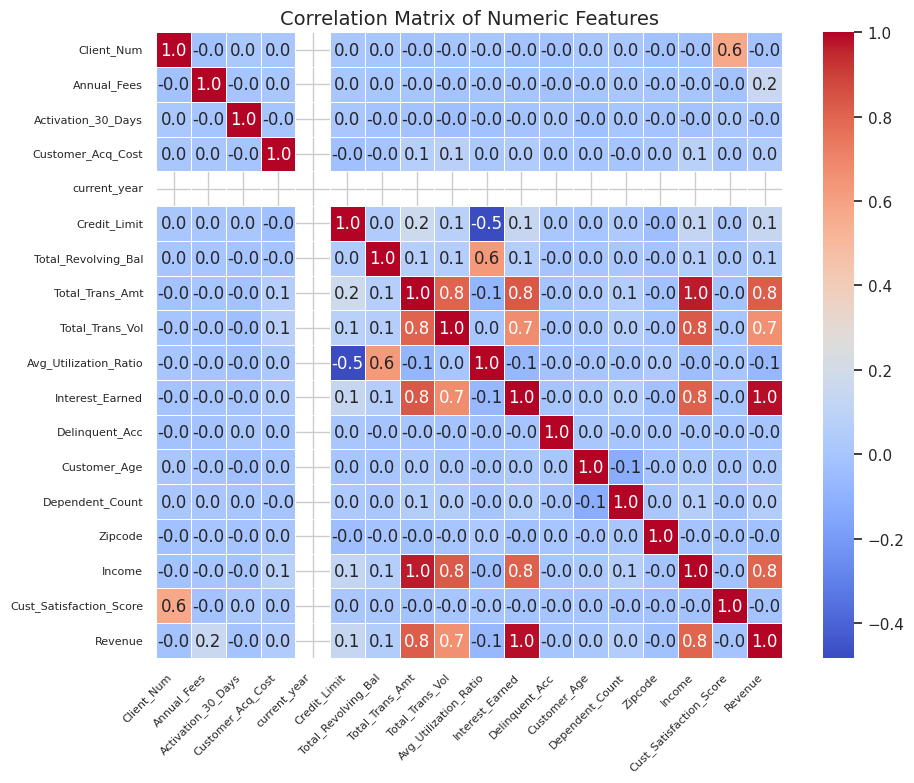

In [15]:
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

#Compute correlation
corr_matrix = numeric_cols.corr()

#Plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, linewidths=0.5, square=True, fmt='.1f')

plt.title('Correlation Matrix of Numeric Features', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

##Insights:
1- **Revenue is strongly correlated with Interest Earned**- Revenue is primarily driven by interest paid by customers.

2- **Total_Trans_Amt and Total_Trans_Vol are highly correlated(0.8)**-Customers who transact frequently also tend to spend more per week.

3- **Interest_Earned is strongly related to Revolving Balance and Revenue(~0.7)**-  Interest earned by the bank grows when customers carry forward large unpaid balances.

4- **Credit_Limit is negatively correlated with Utilization Ratio(-0.5)**- Customers with higher credit limits tend to use a smaller % of their available credit, indicating financially sound behavior.

5- **Cust_Satisfaction_Score and Revenue are weakly correlated**- Although the bank’s revenue is driven by a subset of high-spending customers, these customers don’t necessarily report high satisfaction. This gap indicates a potential churn risk — suggesting that retention strategies should also target high-revenue customers who may be dissatisfied.

6- **Interest_Earned correlates well with Delinquent_Acc(0.8)**- A revenue-risk tradeoff exists — interest from delinquent accounts boosts revenue but increases credit risk. This is a red flag for long-term sustainability.

7- **Avg_Utilization_Ratio has a negative correlation with Credit_Limit(-0.5)**- Customers with lower credit limits tend to utilize a higher proportion of their credit.

Monitoring utilization ratios can help identify customers nearing their credit limits — a useful feature for risk scoring or limit extension strategies.

8- **Customer_Age and Revenue(~0.0)**- Revenue does not depend on age.

Age-neutral revenue indicates the bank's products are equally engaging across age groups — useful for broad-based marketing.



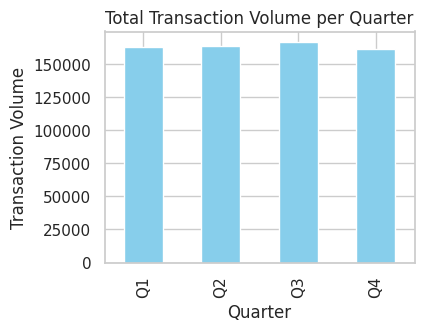

In [16]:
plt.figure(figsize=(4, 3))
df.groupby('Qtr')['Total_Trans_Vol'].sum().plot(kind='bar', color='skyblue')
plt.title('Total Transaction Volume per Quarter')
plt.ylabel('Transaction Volume')
plt.xlabel('Quarter')
plt.show()

##Insight:

Customer spending behavior remains steady across all quarters, indicating consistent card usage without heavy seasonal influence